# Import libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set plt
plt.rcParams['figure.figsize'] = [15, 30]

# SetUp Image

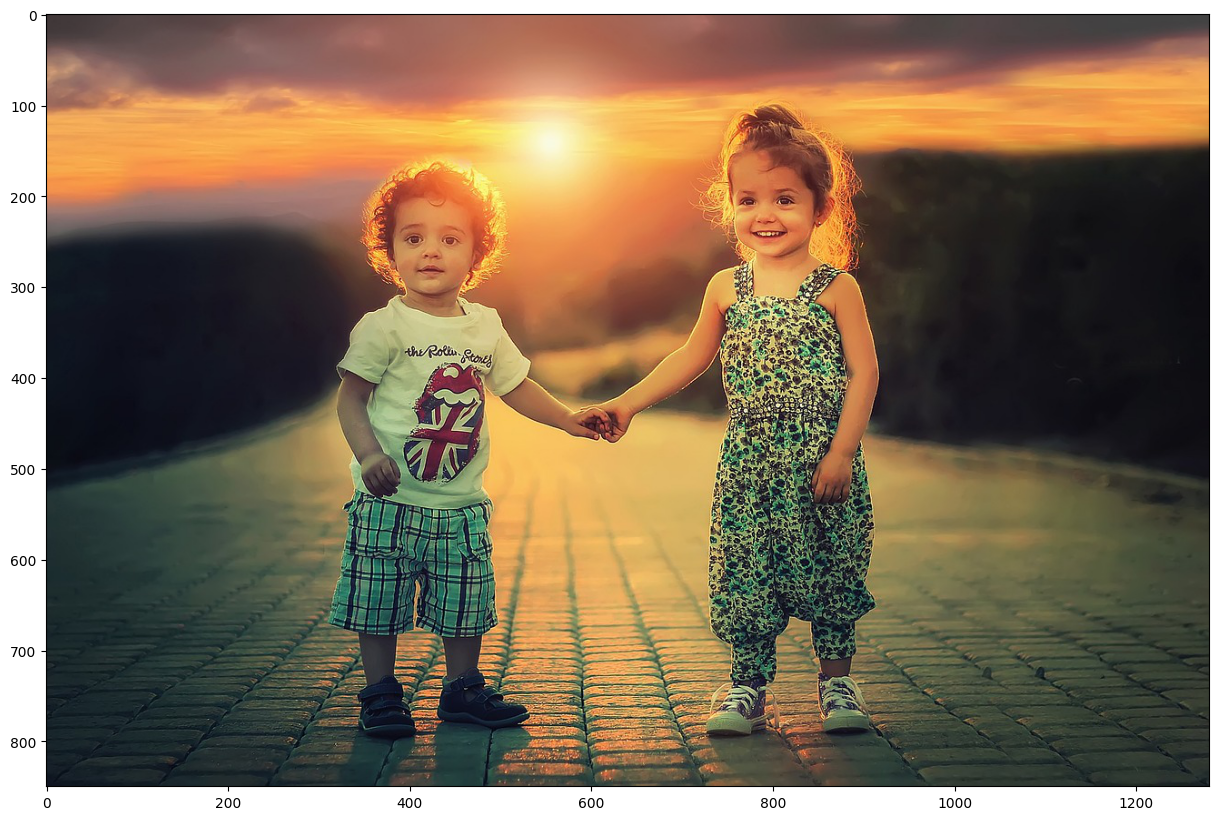

In [8]:
path = 'img\children.jpg'
img = cv2.imread(path)

if img is None:
    print("Error: Unable to load image. Please check the file path.")
else:
    # Convert the image to RGB
    imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(imgrgb)
    plt.show()

# CascadeClassifier untuk mendeteksi wajah

In [9]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
 
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

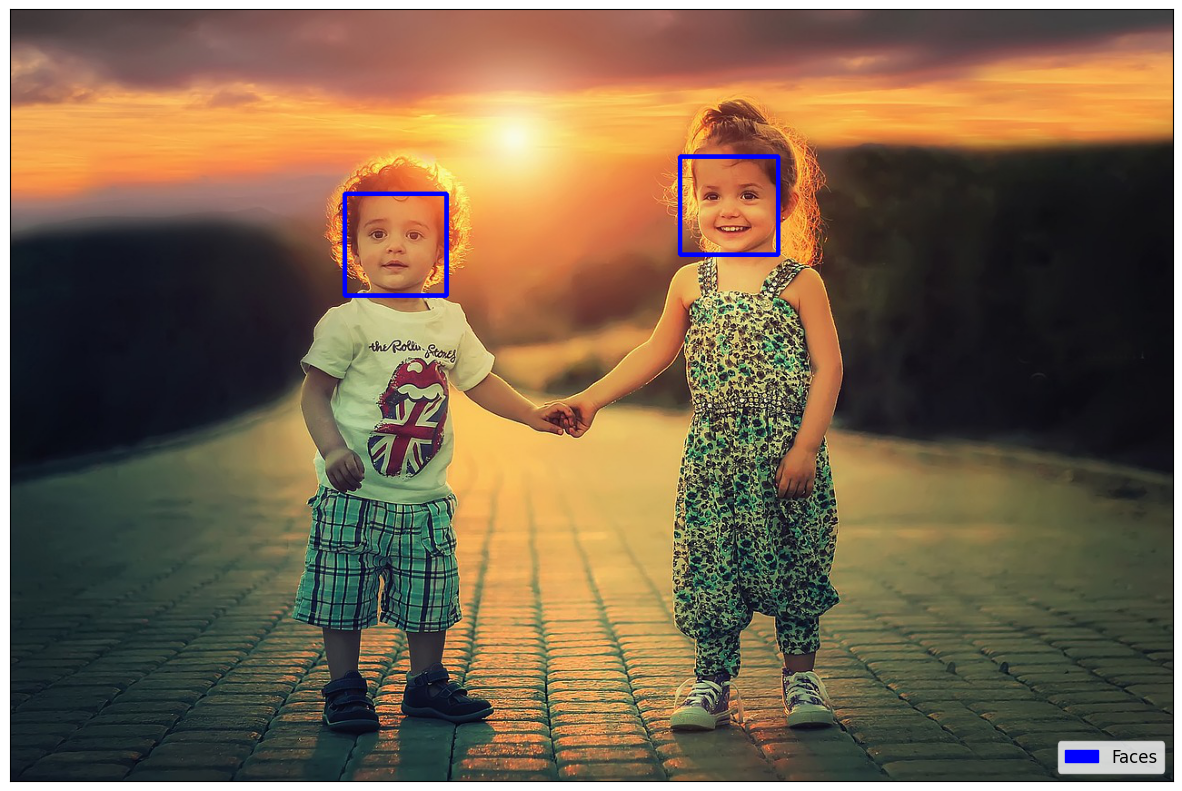

In [10]:
# Add kotak deteksi pada area wajah
faces = face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:
    img = cv2.rectangle(
        img,          # objek gambar
        (x,y),        # posisi kotak
        (x+w,y+h),    # posisi kotak
        (255,0,0),    # warna kotak
        3             # lebar garis kotak
        )
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
plt.xticks([])
plt.yticks([])
 
# Membuat keterangan label
face_patch = mpatches.Patch(color='blue', label='Faces')
plt.legend(handles=[face_patch], 
           loc='lower right', fontsize=12)
 
# Plot gambar
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


# Face, Smile and Eyes detection

In [11]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

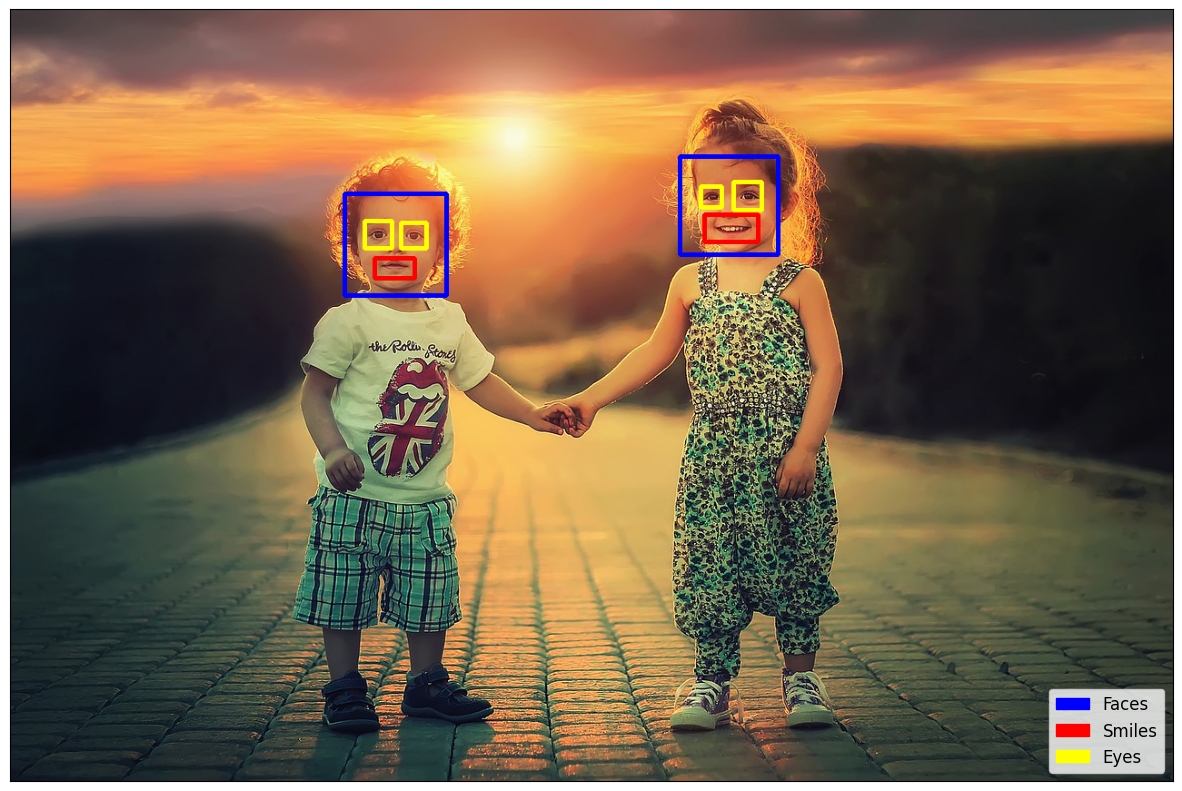

In [12]:
faces =  face_cascade.detectMultiScale(
    gray,          
    scaleFactor = 1.3, 
    minNeighbors = 5
    )
 
for(x, y, w, h) in faces:  
    img = cv2.rectangle(
        img,          # objek gambar
        (x,y),        # posisi awal kotak (horizontal dan vertikal)
        (x+w,y+h),    # posisi kotak dengan penambahan lebar (w) dan tinggi (h)
        (255,0,0),    # warna kotak dalam RGB
        3             # lebar garis kotak
        )
 
    # Mengatur region of interest (ROI) sebagai area target
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
 
    smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=20)
    for(sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw,sy+sh), (0,0,255), 3)
        
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,255), 3)
    
plt.xticks([])
plt.yticks([])
 
face_patch = mpatches.Patch(color='blue', label='Faces')
smile_patch = mpatches.Patch(color='red', label='Smiles')
eye_patch = mpatches.Patch(color='yellow', label='Eyes')
plt.legend(handles=[face_patch, smile_patch, eye_patch], 
           loc='lower right', fontsize=12)
 
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))